HW4
1b

The following features can be ignored as stated in the description:
state, county, community, communityname, fold

These features will be removed first before Data Imputation

In [196]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

com_train = pd.read_csv('training_community.csv',index_col=0)
com_test = pd.read_csv('test_community.csv',index_col=0)

com_train.drop(columns=['state','county','community','communityname','fold'],inplace=True)
com_test.drop(columns=['state','county','community','communityname','fold'],inplace=True)

print(com_train)
print(com_test)




      population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3           0.04           0.77          1.00          0.08          0.12   
4           0.01           0.55          0.02          0.95          0.09   
...          ...            ...           ...           ...           ...   
1490        0.00           0.59          0.01          0.69          1.00   
1491        0.16           0.62          0.03          0.74          0.48   
1492        0.01           0.36          0.95          0.24          0.03   
1493        0.06           0.53          0.01          0.98          0.05   
1494        0.05           0.43          0.08          0.65          0.12   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  

Data Imputation 

Off of our total 122 predictors, only the predictors in last 10-15 columns have missing data, however the amount of this missing data is pretty large. As the missing data is large for these predictors, considering the relevance of data corresponding to the other predictors (other ~100 of them), it obviously makes no sense to discard those missing data rows completely. 

Thus the rows, with even a single missing value for even a single predictor, HERE, can't be completely ignored.

Method we'll use : Consider a dataset with predictors 1,2,3,4 and prediction O

Say 3,4 predictors have missing values

Replace missing values with : A measure of central tendency (we'll use mean)

Next, predict 3 using 1,2,4,O

Replace missing values in 3 with the predicted values

Predict 4 using 1,2,3,O where 3 now has it's predicted values instead of missing values

Continue for all predictors


This method will be used for our dataset

Additionally, once we're done, we'll add a Gaussian Noise term of zero mean and variance equal to regression variance for each predictor to preserve variation in predictor

Reference (Only Theoretical) : https://www.kaggle.com/shashankasubrahmanya/missing-data-imputation-using-regression


Additionally imputation of both the training and the test sets will be done, at once, in a single dataset.


In [197]:
com = pd.concat([com_train,com_test]).reset_index(drop=True)
print(com)
com.to_csv('com_to_impute_file.csv')


      population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3           0.04           0.77          1.00          0.08          0.12   
4           0.01           0.55          0.02          0.95          0.09   
...          ...            ...           ...           ...           ...   
1989        0.01           0.40          0.10          0.87          0.12   
1990        0.05           0.96          0.46          0.28          0.83   
1991        0.16           0.37          0.25          0.69          0.04   
1992        0.08           0.51          0.06          0.87          0.22   
1993        0.20           0.78          0.14          0.46          0.24   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  

In [198]:
com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 123 entries, population to ViolentCrimesPerPop
dtypes: float64(100), object(23)
memory usage: 1.9+ MB


In [199]:
com.describe(include='all')

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994,1994,1994,1994,1994.000000,1994,1994.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,64,39,73,4,NaN,52,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,?,?,?,?,NaN,?,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1675,1675,1675,1675,NaN,1675,NaN
mean,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,0.336264,0.423164,...,0.065231,0.232854,0.161685,NaN,NaN,NaN,NaN,0.094052,NaN,0.237979
std,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,0.166505,0.179185,...,0.109459,0.203092,0.229055,NaN,NaN,NaN,NaN,0.240328,NaN,0.232985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000
25%,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,0.250000,0.300000,...,0.020000,0.100000,0.020000,NaN,NaN,NaN,NaN,0.000000,NaN,0.070000
50%,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,0.290000,0.420000,...,0.040000,0.170000,0.070000,NaN,NaN,NaN,NaN,0.000000,NaN,0.150000
75%,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,0.360000,0.530000,...,0.070000,0.280000,0.190000,NaN,NaN,NaN,NaN,0.000000,NaN,0.330000


In [200]:
mis_header = []
mis_index  = []
mis_count = []
col_header = list(com.columns.values) 
tot_col = np.arange(0,123)
tot_rows = np.arange(0,1994)

i=0
for i in tot_col:
    j=0
    count = 0
    for j in tot_rows:
        if com.iloc[j,i] == '?':
            count = count + 1
            com.iloc[j,i] = np.nan
    
    if count > 0:
        mis_header.append(col_header[i])
        mis_index.append(i)
        mis_count.append(count)


    
print(mis_header)
print(mis_index)
print(mis_count)    
print(com)


['OtherPerCap', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'PolicBudgPerPop']
[25, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 116, 117, 118, 119, 121]
[1, 1675, 1675, 1675, 1675, 1675, 1675, 1675, 1675, 1675, 1675, 1675, 1675, 1675, 1675, 1675, 1675, 1675, 1675, 1675, 1675, 1675, 1675]
      population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3          

The three arrays gives headers, index, and count for missing (?) values. Again, everything is corresponding

All columns except column 25 has a serious amount of missing values. Column 25 only has a single missing value. It should, ideally be treated differently, to save computation, but we'll treat it like any other column for the purpose of uniformity

We've also replaced all ? with NaN

In [201]:
com_null = com.copy()
mis_arr_pointer = np.arange(0,len(mis_index))
rows = np.arange(0,1994)
mis_arr = np.array(mis_index)
k = 0

for k in mis_arr_pointer:
    mean = com.iloc[:,mis_arr[k]].astype('float64').mean(axis=0,skipna=True)
    q=0
    for q in rows:
        if pd.isna(com.iloc[q,mis_arr[k]]):
            com.iloc[q,mis_arr[k]] = mean

print(com_null)
print(com)    


      population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3           0.04           0.77          1.00          0.08          0.12   
4           0.01           0.55          0.02          0.95          0.09   
...          ...            ...           ...           ...           ...   
1989        0.01           0.40          0.10          0.87          0.12   
1990        0.05           0.96          0.46          0.28          0.83   
1991        0.16           0.37          0.25          0.69          0.04   
1992        0.08           0.51          0.06          0.87          0.22   
1993        0.20           0.78          0.14          0.46          0.24   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  

In [202]:
com_mean = com.copy()
l=0
for l in mis_arr_pointer:
    X = com.drop(com.columns[mis_arr[l]],axis=1)
    y = com.iloc[:,mis_arr[l]]
    reg = LinearRegression().fit(X,y)
    y_pred = reg.predict(X)
    
    for j in rows:
        if pd.isna(com_null.iloc[j,mis_arr[l]]):
            com.iloc[j,mis_arr[l]] = y_pred[j]

print(com_mean)
print(com)
com.to_csv('Imputed_Data_Without_Gaussian_Error.csv')

      population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3           0.04           0.77          1.00          0.08          0.12   
4           0.01           0.55          0.02          0.95          0.09   
...          ...            ...           ...           ...           ...   
1989        0.01           0.40          0.10          0.87          0.12   
1990        0.05           0.96          0.46          0.28          0.83   
1991        0.16           0.37          0.25          0.69          0.04   
1992        0.08           0.51          0.06          0.87          0.22   
1993        0.20           0.78          0.14          0.46          0.24   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  

This has imputed com, iteratively, via linear regression. Now we'll add gaussian errors and compare distributions of the final imputed data with the data with NaN, using their histograms.

N = 1994 
p = 122 (total predictors are 123-1, where we exclude the feature being predicted)
N - p - 1 = 1871
Or N - ddof where ddof = 123

Standard Error for Gaussian will be its Standard Deviation, calculated as :
(sum((y-y')^2)/(1871))^0.5

So to each feature, imputed via regression, we'll add,
feature value + Gaussian(mean=0,standard deviation = standard error for that feature)

In [203]:
com_reg = com.copy()
mis_count_arr = np.array(mis_count)
e=0
for e in mis_arr_pointer:
    y = (((com_mean.iloc[:,mis_arr[e]]).to_numpy()).flatten()).astype(float)
    y_pred = (((com.iloc[:,mis_arr[e]]).to_numpy()).flatten()).astype(float)
    err_sq = (y-y_pred)**2
    tot_err_sq = np.sum(err_sq)
    sd = ((tot_err_sq)/(1871))**(0.5)
    normal_dist = np.random.normal(loc=0,scale=sd,size=mis_count_arr[e])
    index_count = 0
    for m in rows:
        if pd.isna(com_null.iloc[m,mis_arr[e]]):
            index_count = index_count + 1
            com.iloc[m,mis_arr[e]]=com.iloc[m,mis_arr[e]]+normal_dist[index_count-1]
            if com.iloc[m,mis_arr[e]] < 0:
                com.iloc[m,mis_arr[e]] = 0


print(com)

com.to_csv('Final_Imputed_Whole.csv')


      population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3           0.04           0.77          1.00          0.08          0.12   
4           0.01           0.55          0.02          0.95          0.09   
...          ...            ...           ...           ...           ...   
1989        0.01           0.40          0.10          0.87          0.12   
1990        0.05           0.96          0.46          0.28          0.83   
1991        0.16           0.37          0.25          0.69          0.04   
1992        0.08           0.51          0.06          0.87          0.22   
1993        0.20           0.78          0.14          0.46          0.24   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  

Thus, the final imputed dataset containing all rows is stored to Final_Imputed_Whole

This .csv file will change when we run this code as Normal Distribution will change each time

Also we have assumed that no feature can take negative values. Thus in the addition of normal random error if the final imputed output is negative, it is held at 0.

Now we'll compare histograms from:

com_to_impute.csv and Final_Imputed_Whole.csv for some random feature which was imputed, say 'PolicCars' which had 1675 NaN's

This comparison will be via their histograms, to see how closely imputed values match the original distribution

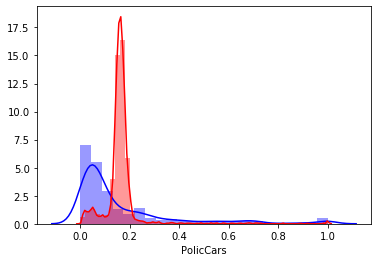

In [204]:
sns.distplot(com_null['PolicCars'].dropna(),color='blue')
sns.distplot(com['PolicCars'],color='red')

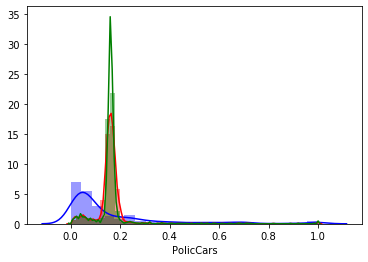

In [205]:
sns.distplot(com_null['PolicCars'].dropna(),color='blue')
sns.distplot(com['PolicCars'],color='red')
sns.distplot(com_reg['PolicCars'],color='green')

Here, blue = original (com_null)
      red  = final (with gaussian errors) (com)
      green = only with regression/without gaussian (com_reg)
      
As can be seen green has a much more skew from blue, and has a very sharp frequential distribution which the gaussian error does attempt to 'reduce' and thus gaussian allows for added variability as seen by blue and red.

Green = Sharp Distribution, less variability
Red = Variability comparable to original (blue)

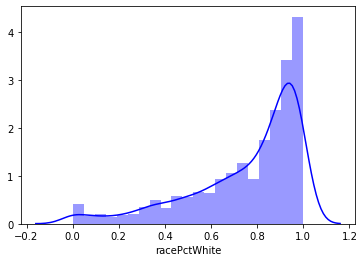

In [206]:
sns.distplot(com_null['racePctWhite'].dropna(),color='blue')


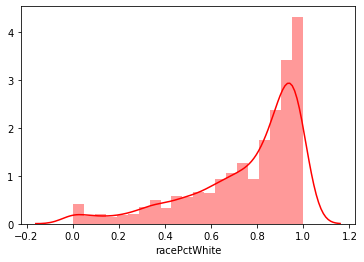

In [207]:
sns.distplot(com['racePctWhite'],color='red')

Conclusions:

racePctWhite in the original dataset had no missing values and thus it stays as is in the imputed set (The previous two curves)

While PolicCars had 1675 missing values. Imputing such a huge set of values, does yield a distribution that can't be closely compared to the original one, however we've plotted the two distributions for the original null set ignoring the null values and the imputed set.

There is a difference obviously in those two distribution, the reason being the large number of values that had to be imputed

The highest frequency in original is about 0.1, while in the imputed one is 0.2

We could plot the com_reg curve too, it will have a lesser variability than com_null and com (final one) both